# Ising model in the fuzzy alternative sphere: 

In [2]:
include("Exact-Diagonalization-routines-modified.jl")

using Arpack  # For exact diagonalization using sparse arrays
using Plots  # For plotting
using LaTeXStrings # LaTex strings
using LinearAlgebra  # For linear algebra operations
using CurveFit

In [3]:
############################################ Physical system properties #############################################
lmax = 1                              # Max value of the angular momentum (l,m)
length = (lmax+1)^2                   # Physical length of the system (Number of orbitals up to lmax)
N = length                            # Filling
L = 2*length                          # String length (twice because is spinful electrons)
mz = 0                                # U(1) of the SO(3)

########################################### Interactions/couplings value ############################################
hz = 3.16                             # Magnetic field h
v00 = 23*pi                           # V0 term from the onsite term n^0 n^0
v11 = 8*pi                            # V1 term from the onsite term n^0 n^0
J00 = v00                             # J0 term from the FM term n^z n^z
J11 = v11                             # J1 term from the FM term n^z n^z

############################################## Choose any of the basis ##############################################
#(stateList0,basisMap0) = makeBasisMap(N,lmax)                       # U(1) of particle number
(stateList0,basisMap0) = makeBasisMapMz(N,lmax,mz)                  # U(1) of particle number and U(1) of SO(3)


################################ Packing all the information into a single structure ################################
HL = HIsing(N=N,half_L=length,lmax=lmax,h=hz,v00=v00,v11=v11,J00=J00,J11=J11,stateList=stateList0,basisMap=basisMap0)


################################ Creating the Hamiltonian and obtaining the spectrum ################################
@time Hsparse = Hermitian(makeH(HL))                              # Creating Hamiltonian and Hermitian
#(vals, vecs) = eigs(Hsparse, nev=1, which=:SR)              # Lowest eigenstates and eigenvalues
(vals, vecs) = eigen(collect(Hsparse))                      # Full spectrum

vals
#vecs[:,2]
########################################################################################################################
# lmax = 1 takes 0.04s
# lmax = 2 takes 111s

  0.087328 seconds (233.69 k allocations: 4.328 MiB, 72.26% compilation time)


26-element Vector{Float64}:
 -7.345345581492531
 -4.02936585839236
  2.2917682765359544
  7.504432280393033
  9.799974538068387
 10.860252370953567
 12.500000000000004
 14.160252370953561
 16.699999999999992
 17.004432280393033
 18.557316853530622
 18.672939211335798
 18.8
 18.999999999999996
 20.000000000000004
 20.495567719606957
 21.999999999999993
 23.38063809362071
 23.53974762904644
 26.83974762904645
 27.20000000000001
 28.300000000000004
 29.99556771960696
 30.49999999999999
 31.672074466793315
 37.99999999999999

## Magnetization order parameter

In [9]:
####################################### Physical system properties #######################################
mz = 0
Nh = 15
lmaxList = Int[1,2]

###################################### Interactions/couplings value ######################################
v00 = 23*pi                           # V0 term from the onsite term n^0 n^0
v11 = 8*pi                            # V1 term from the onsite term n^0 n^0
J00 = v00                             # J0 term from the FM term n^z n^z
J11 = v11                             # J1 term from the FM term n^z n^z
h = range(0.01,4,Nh)
mList = []
m2List = []
m4List = []

################################### Getting the magnetization ###################################
for lmax in lmaxList
    length = (lmax+1)^2
    N = length 
    m = zeros(Real, Nh)
    m2 = zeros(Real, Nh)
    m4 = zeros(Real, Nh)
    (stateList0,basisMap0) = makeBasisMapMz(N,lmax,mz)
    i=1
    for hz in h
        HL = HIsing(N=N,half_L=length,lmax=lmax,h=hz,v00=v00,v11=v11,J00=J00,J11=J11,stateList=stateList0,basisMap=basisMap0)
        Hsparse = Hermitian(makeH(HL))
        #println(Hsparse)
        if length >= 8
            println("hamiltonian constructed")
        end
        (vals,vecs) = eigs(Hsparse, nev=1, which=:SR)
        gs_state = vecs[:,1]
        (m[i],m2[i],m4[i])=computeMagnetization(gs_state,stateList0,basisMap0,length)
        i+=1
    end
    println("Length finished")
    push!(mList, m)
    push!(m2List, m2)
    push!(m4List, m4)
end

Length finished
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
hamiltonian constructed
Length finished


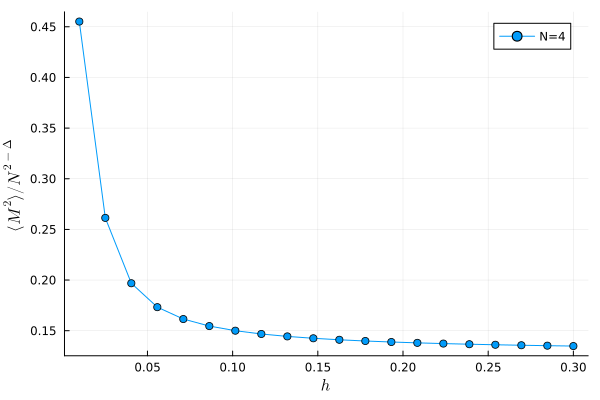

In [14]:
plot(h, [(m2List[1])./4^(2-0.518)], labels = ["N=4" "N=9" ], marker= (:circle))
xlabel!(L"h")
ylabel!(L"\langle M^2 \rangle/N^{2-\Delta}")

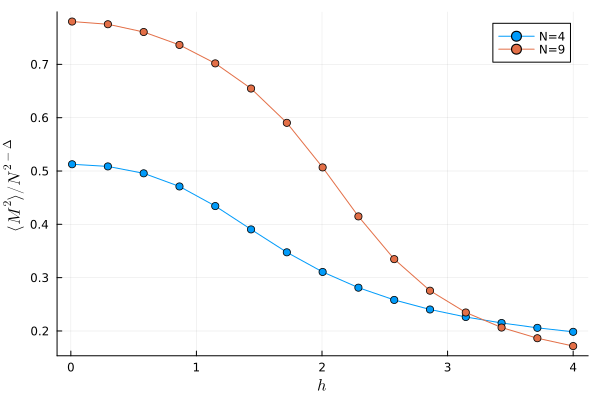

In [10]:
plot(h, [(m2List[1])./4^(2-0.518), (m2List[2])./9^(2-0.518)], labels = ["N=4" "N=9" ], marker= (:circle))
xlabel!(L"h")
ylabel!(L"\langle M^2 \rangle/N^{2-\Delta}")

## Spectrum at the crossing

  0.059123 seconds (587.47 k allocations: 9.042 MiB)
true
  0.011050 seconds (18 allocations: 179.750 KiB)


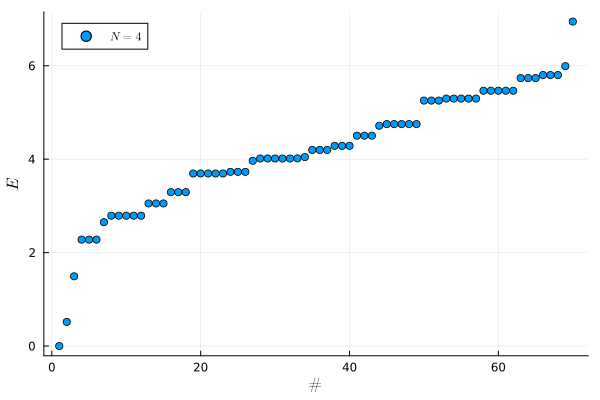

In [59]:
h = 3.2                             # Magnetic field h
v00 = 23*pi                           # V0 term from the onsite term n^0 n^0
v11 = 8*pi                            # V1 term from the onsite term n^0 n^0
J00 = v00                             # J0 term from the FM term n^z n^z
J11 = v11                             # J1 term from the FM term n^z n^z
#mz = 0

lmax = 1
length = (lmax+1)^2
N = length
L = 2*length

#(stateList0, basisMap0) = makeBasisMapMz(N,lmax,mz)
(stateList0, basisMap0) = makeBasisMap(N,lmax)
HL = HIsing(N=N,half_L=length,lmax=lmax,h=h,v00=v00,v11=v11,J00=J00,J11=J11,stateList=stateList0,basisMap=basisMap0)

@time Hsparse = makeH(HL)                              # Creating Hamiltonian and Hermitian
println(ishermitian(Hsparse))
@time (vals, vecs) = eigen(collect(Hsparse)) 

gs= vals[1]
vals = vals - fill(gs, size(vals)[1])
sigma = vals[2]
vals = 0.518*vals./sigma

scatter(vals, labels = L"N = 4")
ylabel!(L"E")
xlabel!(L"\#")

  0.004253 seconds (50.38 k allocations: 797.641 KiB)
  0.117621 seconds (85.21 k allocations: 5.488 MiB, 98.04% compilation time)
  0.011733 seconds (134.29 k allocations: 2.068 MiB)
  0.000092 seconds (14 allocations: 14.906 KiB)
  0.017042 seconds (218.22 k allocations: 3.374 MiB)
  0.000218 seconds (14 allocations: 31.891 KiB)
  0.010618 seconds (134.29 k allocations: 2.068 MiB)
  0.000136 seconds (14 allocations: 14.906 KiB)
  0.005205 seconds (50.38 k allocations: 797.641 KiB)
  0.000047 seconds (14 allocations: 4.078 KiB)


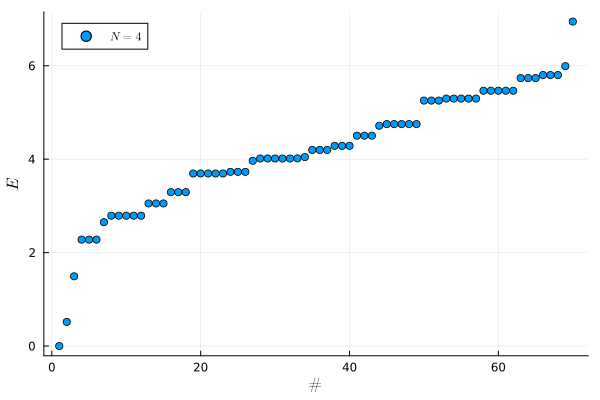

In [39]:
## The full spectrum

h = 3.2                             # Magnetic field h
v00 = 23*pi                           # V0 term from the onsite term n^0 n^0
v11 = 8*pi                            # V1 term from the onsite term n^0 n^0
J00 = v00                             # J0 term from the FM term n^z n^z
J11 = v11                             # J1 term from the FM term n^z n^z


lmax = 1
length = (lmax+1)^2
N = length
L = 2*length

eigsList = []

for mz in -2:2
    (stateList0, basisMap0) = makeBasisMapMz(N,lmax,mz)
    HL = HIsing(N=N,half_L=length,lmax=lmax,h=h,v00=v00,v11=v11,J00=J00,J11=J11,stateList=stateList0,basisMap=basisMap0)
    @time Hsparse = Hermitian(makeH(HL))                              # Creating Hamiltonian and Hermitian
    #println(ishermitian(Hsparse))
    @time (vals, vecs) = eigen(collect(Hsparse))
    push!(eigsList, vals)
    if mz == 0 
        gs = vals[1]
        sigma = vals[2]
    end
end

eigVals = sort(vcat(eigsList...))

eigVals = eigVals - fill(gs, size(eigVals)[1])

sigma -= gs
eigVals = 0.518*eigVals./sigma

scatter(eigVals, labels = L"N = 4")
ylabel!(L"E")
xlabel!(L"\#")

129.978296 seconds (1.56 G allocations: 23.355 GiB, 16.82% gc time)
  4.109621 seconds (5.24 M allocations: 355.783 MiB, 6.88% gc time, 95.47% compilation time)


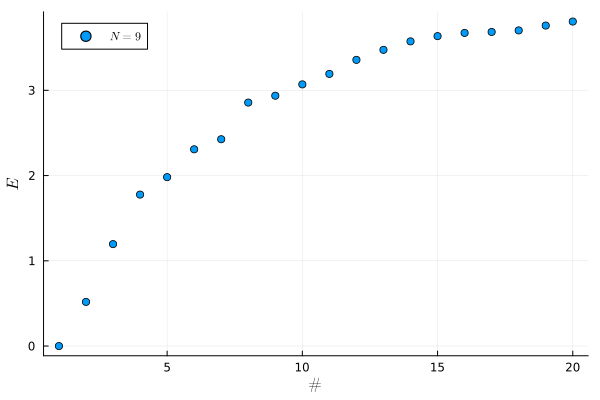

In [5]:
h = 0.42                             # Magnetic field h
v00 = 4.75                           # V0 term from the onsite term n^0 n^0
v11 = 1                              # V1 term from the onsite term n^0 n^0
J00 = 4.75                           # J0 term from the FM term n^z n^z
J11 = 1                              # J1 term from the FM term n^z n^z

lmax = 2
length = (lmax+1)^2
N = length
L = 2*length

(stateList0, basisMap0) = makeBasisMapMz(N,lmax,mz)
HL = HIsing(N=N,half_L=length,lmax=lmax,h=h,v00=v00,v11=v11,J00=J00,J11=J11,stateList=stateList0,basisMap=basisMap0)

@time Hsparse = Hermitian(makeH(HL))                              # Creating Hamiltonian and Hermitian
#println(ishermitian(Hsparse))
@time (vals, vecs) = eigs(Hsparse, nev =20, which=:SR) 

gs= vals[1]
vals = vals - fill(gs, size(vals)[1])
sigma = vals[2]
vals = 0.518*vals./sigma

scatter(vals, labels = L"N = 9")
ylabel!(L"E")
xlabel!(L"\#")

  1.333747 seconds (3.85 M allocations: 59.142 MiB, 71.20% gc time)
  0.008206 seconds (300 allocations: 23.047 KiB)
  4.819710 seconds (23.11 M allocations: 354.867 MiB, 49.21% gc time)
  0.002698 seconds (1.80 k allocations: 138.438 KiB)
 10.320816 seconds (87.07 M allocations: 1.307 GiB, 18.74% gc time)
  0.013450 seconds (2.51 k allocations: 325.172 KiB)
 25.099808 seconds (220.37 M allocations: 3.307 GiB, 17.95% gc time)
  0.034573 seconds (3.12 k allocations: 681.828 KiB)
 51.080378 seconds (452.31 M allocations: 6.782 GiB, 17.44% gc time)
  0.064301 seconds (3.81 k allocations: 1.260 MiB)
 75.977988 seconds (756.70 M allocations: 11.342 GiB, 18.90% gc time)
  0.096364 seconds (3.17 k allocations: 1.984 MiB)
111.266202 seconds (1.09 G allocations: 16.285 GiB, 18.53% gc time)
  0.177739 seconds (3.48 k allocations: 2.805 MiB)
136.818497 seconds (1.33 G allocations: 20.003 GiB, 17.61% gc time)
  0.200927 seconds (3.83 k allocations: 3.427 MiB)
173.152135 seconds (1.44 G allocations

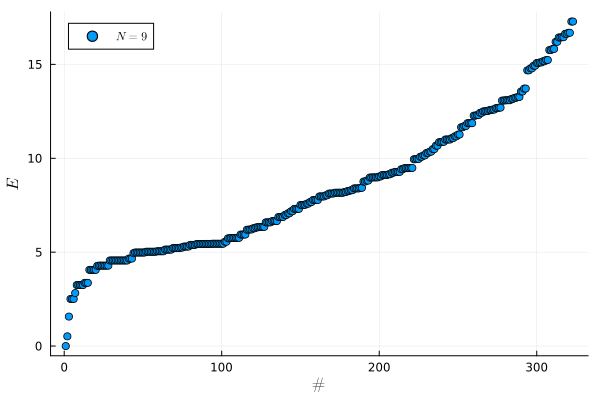

In [49]:
## The full spectrum

h = 3.2                             # Magnetic field h
v00 = 23*pi                           # V0 term from the onsite term n^0 n^0
v11 = 8*pi                            # V1 term from the onsite term n^0 n^0
J00 = v00                             # J0 term from the FM term n^z n^z
J11 = v11                             # J1 term from the FM term n^z n^z


lmax = 2
length = (lmax+1)^2
N = length
L = 2*length

eigsList = []

for mz in -8:8
    (stateList0, basisMap0) = makeBasisMapMz(N,lmax,mz)
    HL = HIsing(N=N,half_L=length,lmax=lmax,h=h,v00=v00,v11=v11,J00=J00,J11=J11,stateList=stateList0,basisMap=basisMap0)
    @time Hsparse = Hermitian(makeH(HL))                              # Creating Hamiltonian and Hermitian
    #println(ishermitian(Hsparse))
    @time (vals, vecs) = eigs(Hsparse, nev=19, which=:SR) 
    push!(eigsList, vals)
    if mz == 0 
        gs = vals[1]
        sigma = vals[2]
    end
end

eigVals = sort(vcat(eigsList...))

eigVals = eigVals - fill(gs, size(eigVals)[1])

sigma -= gs
eigVals = 0.518*eigVals./sigma

scatter(eigVals, labels = L"N = 9")
ylabel!(L"E")
xlabel!(L"\#")

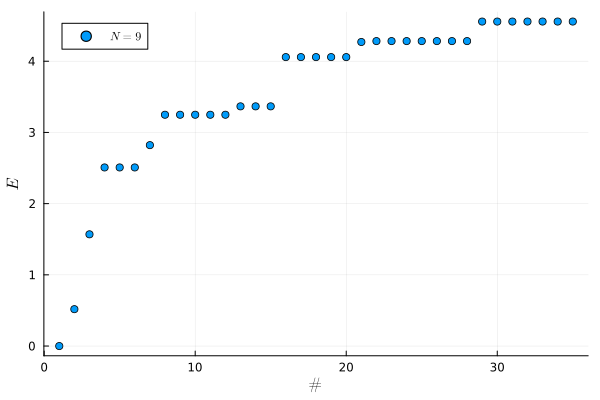

In [54]:
scatter(eigVals[1:35], labels = L"N = 9")
ylabel!(L"E")
xlabel!(L"\#")

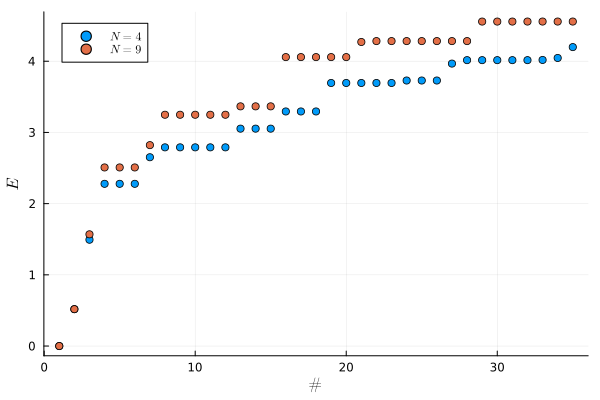

In [61]:
scatter(vals[1:35], labels = L"N = 4")
scatter!(vals1[1:35], labels = L"N = 9")
ylabel!(L"E")
xlabel!(L"\#")

In [57]:
vals1 = eigVals[1:35]

35-element Vector{Float64}:
 0.0
 0.518
 1.5692135894387178
 2.508138356069057
 2.508138356069059
 2.5081383560690638
 2.821400303820307
 3.2481283622741075
 3.2481283622741084
 3.2481283622741115
 3.248128362274112
 3.248128362274113
 3.3660292688550433
 ⋮
 4.282452249945065
 4.282452249945066
 4.282452249945066
 4.282452249945068
 4.282452249945069
 4.556615822267793
 4.556615822267794
 4.556615822267797
 4.5569427581713375
 4.5569427581713375
 4.556942758171339
 4.55694275817134

### Cost function

In [ ]:
################## This part is missing #############################

In [ ]:
############################    sigma = 0.518, epsilon = 1.413, \partial sigma = 1.518,      ###########################
##############################    []\sigma = 2.518, \partial^2 \sigma = 2.518, T = 3.    ###################################

lmax = 2
length = (lmax+1)^2
N = length
L = 2*length

function cost(opt_couplings)
    N = length
    h = opt_couplings[1]
    v00 = opt_couplings[2]
    v11 = 1
    J00 = opt_couplings[2]
    J11 = 1

    valsListL = []
    gs_val = 0
    sigma_val = 1/8
    eps_val = 1
    for mz in 0:2:8
        valsListMz = []
        (stateList0,basisMap) = makeBasisMapMz(N,length,mz)
        for parityz2 in [1,-1]
            (stateList, basisMap) = basisZ2(stateList0, length, parityz2)
            HL = HIsingZ2(N=N,half_L=length,parity=parityz2,h=h,g00=g00,g22=g22,J00=J00,J22=J22,stateList=stateList,basisMap=basisMap)
            Hsparse = makeH(HL)
            (row, column) = size(Hsparse)
            if length >= 12
                println("hamiltonian constructed")
            end 
            if 0 < row <= 3
                (vals,vecs) = eigen(collect(Hermitian(Hsparse)))
            elseif row == 0
                continue
            else
                (vals, vecs) = eigs(Hermitian(Hsparse), nev=4, which=:SR)
            end
            if mz == 0 & parityz2 == 1
                gs_val = vals[1]
                eps_val = vals[2]
            end
            vals = vals - fill(gs_val, size(vals)[1])
            
            if mz == 0 & parityz2 == -1 
                sigma_val = vals[1]
            end
            #vals = vals - fill(gs_val, size(vals)[1])
            #vals = vals./(eps_val)
            push!(valsListMz, vals)
        end
        push!(valsListL, valsListMz)
    end
    sigma_val *= 8
    

    valsListL[1][1] = valsListL[1][1][2:4]
    valsListL[1][2] = valsListL[1][2][1:3]
    valsListL[2][1] = valsListL[2][1][1:2]
    valsListL[2][2] = valsListL[2][2][1:2]
    valsListL[3][1] = valsListL[3][1][1:2]
    valsListL[3][2] = valsListL[3][2][1:2]
    valsListL[4][1] = valsListL[4][1][1:2]
    valsListL[4][2] = valsListL[4][2][1]
    valsListL[5][1] = valsListL[5][1][1]
    valsListL[5][2] = valsListL[5][2][1]

    dim_1 = [item for sublist in valsListL for inner in sublist for item in inner]
    dim_1 = dim_1./sigma_val

    #valsListL = vcat(valsListL...)

    try 
        dim_0 = Float64[1,3,4,1/8,17/8,33/8,2,4,9/8,25/8,2,3,17/8,33/8,3,4,25/8,4,33/8]
        #dim_1 = valsListL

        coeff_2 = sum(abs.(dim_1).^2)
        coeff_1 = sum(dim_1.*dim_0)
        coeff_0 = sum(dim_0.^2)

        renorm = coeff_1/coeff_2
        cost = coeff_0 - abs(coeff_1)^2/coeff_2
        lin_cost = sqrt(cost/19)
        @show opt_couplings
        @show renorm, lin_cost
        return cost
    catch 
        return 100.0
    end 
end
# Maybe the problem is that we only want the lower dofs to match the spectrum ? I was doing something stupid

optimize( cost,[0.953111880487227, 0.8556167334599883, 0.05793184837877322, 0.39799692447514706], NelderMead(), Optim.Options(g_tol=1e-6) )